This ipynb file is intended to perform some tests and analysis, which are not performed in main.py to keep it as clean and tidy as possible.
- Perform exploratory analysis.
- Function testing.
- Understand the initial structure of the data and its values.




In [67]:
import requests 
from datetime import datetime
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns

logging.basicConfig(format='%(levelname)s: %(message)s', level=logging.INFO)


## *EXTRACTING DATA*

In [68]:
#  This function extracts data from a URL, with logging and exception handling.
def extract_api(url, api_key=None ,params=None, dict_key=None):
    try :
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        logging.info("data successfully obtained")
        if dict_key in data:
            return pd.DataFrame(data[dict_key])
        else:
            return pd.DataFrame(data)
    except requests.exceptions.RequestException as e:
        logging.error(f"Error fetching data: {e}")
        return None
    except KeyError as e:
        logging.error(f"Key '{dict_key}' not found in response: {e}")
        return None



##### *HISTORIC CRUDE OIL PRICE (BRENT)*

In [69]:

api_key = '5ab63390c0512057573ddd24139323ef'

crude_oil_url = f"https://api.stlouisfed.org/fred/series/observations?series_id=POILBREUSDM&api_key={api_key}&file_type=json"

params = {
        'series_id': 'POILBREUSDM',
        'file_type': 'json',
        'observation_start': '2010-01-01',
        'observation_end': datetime.now().strftime('%Y-%m-%d')
    }


In [70]:
crude_oil_df = extract_api(crude_oil_url, api_key, params, dict_key='observations')

INFO: data successfully obtained


In [71]:
type(crude_oil_df)

pandas.core.frame.DataFrame

##### *HISTORIC DOLAR PRICE (BLUE) - ARGENTINA DATOS*

In [72]:
### DOLAR API ###

dolar_url = "https://api.argentinadatos.com/v1/cotizaciones/dolares"


In [73]:
dolar_df = extract_api(dolar_url)

INFO: data successfully obtained


##### *HISTORIC FUEL PRICES IN ARGENTINA*


In [74]:
hist_fuel_prices_arg = pd.read_csv("../src/precios-historicos.csv", encoding='latin-1')

In [75]:
hist_fuel_prices_arg.head()

,ï»¿idempresa,empresa,direccion,localidad,provincia,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,anio,mes
0,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,985.0,01/04/2024 10:11,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2024,4
1,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,985.0,01/04/2024 10:11,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2024,4
2,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,1080.0,01/07/2024 09:43,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2024,7
3,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,3,Nocturno,1080.0,01/07/2024 09:43,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2024,7
4,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,19,Gas Oil Grado 2,2,Diurno,1108.0,01/08/2024 13:40,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2024,8


##### *CURRENT FUEL PRICES IN ARGENTINA*

In [76]:
current_fuel_prices_arg = pd.read_csv("../src/precios-en-surtidor vigentes.csv", encoding='latin-1')

##### *FUEL SALES BY SECTOR AND PROVINCE*


In [77]:
fuel_sales = pd.read_csv("../src/ventas-mercado-producto-provincia.csv", encoding='latin-1')

## *EXPLORATORY ANALYSIS*

In [78]:
def expl_function(df): #  a brief analysis of each dataframe to understand its structure and values
    logging.info(f"SHAPE \n {df.shape}")
    logging.info(f"HEAD \n {df.head(3)}")
    logging.info(f"NULL VALUES\n {df.isna().sum()}")
    logging.info(f"COLUMNS INFO {df.info()}")
    

##### *CRUDE OIL*

In [79]:
expl_function(crude_oil_df)

INFO: SHAPE 
 (546, 4)
INFO: HEAD 
   realtime_start realtime_end        date value
0     2025-09-16   2025-09-16  1980-01-01     .
1     2025-09-16   2025-09-16  1980-02-01     .
2     2025-09-16   2025-09-16  1980-03-01     .
INFO: NULL VALUES
 realtime_start    0
realtime_end      0
date              0
value             0
dtype: int64
INFO: COLUMNS INFO None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  546 non-null    object
 1   realtime_end    546 non-null    object
 2   date            546 non-null    object
 3   value           546 non-null    object
dtypes: object(4)
memory usage: 17.2+ KB


In [80]:
crude_oil_df[crude_oil_df['value']=="."] 
#  we can see that there are periods where there isn't oil price, we'll drop it
#  also we'll check dtype columns.

,realtime_start,realtime_end,date,value
0,2025-09-16,2025-09-16,1980-01-01,.
1,2025-09-16,2025-09-16,1980-02-01,.
2,2025-09-16,2025-09-16,1980-03-01,.
3,2025-09-16,2025-09-16,1980-04-01,.
4,2025-09-16,2025-09-16,1980-05-01,.
...,...,...,...,...
115,2025-09-16,2025-09-16,1989-08-01,.
116,2025-09-16,2025-09-16,1989-09-01,.
117,2025-09-16,2025-09-16,1989-10-01,.
118,2025-09-16,2025-09-16,1989-11-01,.


##### *HISTORIC DOLAR PRICE*

In [81]:
expl_function(dolar_df)

INFO: SHAPE 
 (27758, 4)
INFO: HEAD 
         casa  compra  venta       fecha
0       blue    4.00   4.00  2011-01-03
1  mayorista    3.97   3.98  2011-01-03
2    oficial    4.00   4.00  2011-01-03
INFO: NULL VALUES
 casa       0
compra    96
venta      0
fecha      0
dtype: int64
INFO: COLUMNS INFO None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27758 entries, 0 to 27757
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   casa    27758 non-null  object 
 1   compra  27662 non-null  float64
 2   venta   27758 non-null  float64
 3   fecha   27758 non-null  object 
dtypes: float64(2), object(2)
memory usage: 867.6+ KB


In [82]:
dolar_df.loc[ dolar_df['compra'] > dolar_df['venta'], : ] 
# The average will be calculated where the purchase price is higher than the sale price. 
# we'll check dtype columns.

,casa,compra,venta,fecha
1494,blue,6.0,5.0,2012-05-15
1500,blue,6.0,5.0,2012-05-17
1562,oficial,5.0,4.0,2012-06-06
1565,oficial,5.0,4.0,2012-06-07
1568,oficial,5.0,4.0,2012-06-08
...,...,...,...,...
27103,contadoconliqui,1190.7,1189.5,2025-06-15
27110,contadoconliqui,1190.7,1189.5,2025-06-16
27334,contadoconliqui,1300.0,1269.2,2025-07-18
27341,contadoconliqui,1300.0,1269.2,2025-07-19


##### *HISTORIC FUEL PRICES IN ARGENTINA*


In [83]:
expl_function(hist_fuel_prices_arg)

INFO: SHAPE 
 (3147970, 18)
INFO: HEAD 
    ï»¿idempresa               empresa        direccion          localidad  \
0          1376  10 DE SETIEMBRE S.A.  Av. Mosconi 299  LOMAS DEL MIRADOR   
1          1376  10 DE SETIEMBRE S.A.  Av. Mosconi 299  LOMAS DEL MIRADOR   
2          1376  10 DE SETIEMBRE S.A.  Av. Mosconi 299  LOMAS DEL MIRADOR   

      provincia  idproducto         producto  idtipohorario tipohorario  \
0  BUENOS AIRES          19  Gas Oil Grado 2              2      Diurno   
1  BUENOS AIRES          19  Gas Oil Grado 2              3    Nocturno   
2  BUENOS AIRES          19  Gas Oil Grado 2              2      Diurno   

   precio    fecha_vigencia  idempresabandera empresabandera    latitud  \
0   985.0  01/04/2024 10:11                28           PUMA -34.658476   
1   985.0  01/04/2024 10:11                28           PUMA -34.658476   
2  1080.0  01/07/2024 09:43                28           PUMA -34.658476   

    longitud                                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147970 entries, 0 to 3147969
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ï»¿idempresa      int64  
 1   empresa           object 
 2   direccion         object 
 3   localidad         object 
 4   provincia         object 
 5   idproducto        int64  
 6   producto          object 
 7   idtipohorario     int64  
 8   tipohorario       object 
 9   precio            float64
 10  fecha_vigencia    object 
 11  idempresabandera  int64  
 12  empresabandera    object 
 13  latitud           float64
 14  longitud          float64
 15  geojson           object 
 16  anio              int64  
 17  mes               int64  
dtypes: float64(3), int64(6), object(9)
memory usage: 432.3+ MB


In [84]:
hist_fuel_prices_arg.fecha_vigencia.max()


'31/12/2024 23:55'

In [85]:
hist_fuel_prices_arg.fecha_vigencia.min()

'01/01/0001 00:00'

##### *CURRENT FUEL PRICES IN ARGENTINA*

In [86]:
expl_function(current_fuel_prices_arg)

INFO: SHAPE 
 (36963, 19)
INFO: HEAD 
   ï»¿indice_tiempo  idempresa           cuit               empresa  \
0          2025-06       1376  33-64337382-9  10 DE SETIEMBRE S.A.   
1          2025-06       1376  33-64337382-9  10 DE SETIEMBRE S.A.   
2          2025-06       1376  33-64337382-9  10 DE SETIEMBRE S.A.   

         direccion          localidad     provincia    region  idproducto  \
0  Av. Mosconi 299  LOMAS DEL MIRADOR  BUENOS AIRES  PAMPEANA          19   
1  Av. Mosconi 299  LOMAS DEL MIRADOR  BUENOS AIRES  PAMPEANA          19   
2  Av. Mosconi 299  LOMAS DEL MIRADOR  BUENOS AIRES  PAMPEANA          21   

          producto  idtipohorario tipohorario  precio       fecha_vigencia  \
0  Gas Oil Grado 2              2      Diurno  1338.0  2025-06-21 09:41:00   
1  Gas Oil Grado 2              3    Nocturno  1338.0  2025-06-21 09:41:00   
2  Gas Oil Grado 3              2      Diurno  1552.0  2025-06-21 09:41:00   

   idempresabandera empresabandera    latitud   longitud  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36963 entries, 0 to 36962
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿indice_tiempo  36963 non-null  object 
 1   idempresa         36963 non-null  int64  
 2   cuit              36963 non-null  object 
 3   empresa           36963 non-null  object 
 4   direccion         36963 non-null  object 
 5   localidad         36963 non-null  object 
 6   provincia         36963 non-null  object 
 7   region            29120 non-null  object 
 8   idproducto        36963 non-null  int64  
 9   producto          36963 non-null  object 
 10  idtipohorario     36963 non-null  int64  
 11  tipohorario       36963 non-null  object 
 12  precio            36963 non-null  float64
 13  fecha_vigencia    36963 non-null  object 
 14  idempresabandera  36963 non-null  int64  
 15  empresabandera    36963 non-null  object 
 16  latitud           36867 non-null  float6

In [87]:
current_fuel_prices_arg.fecha_vigencia.max()

'2025-08-21 10:49:00'

In [88]:
current_fuel_prices_arg.fecha_vigencia.min()

'2016-06-01 11:58:00'

##### *FUEL SALES BY SECTOR AND PROVINCE*


In [89]:
expl_function(fuel_sales)

INFO: SHAPE 
 (858241, 8)
INFO: HEAD 
    anio  mes            producto unidad     provincia      sector  total  \
0  2010    1  Aerokerosene (Jet)   (m3)  Buenos Aires        Agro    0.0   
1  2010    1  Aerokerosene (Jet)   (m3)  Buenos Aires  Al Público    0.0   
2  2010    1  Aerokerosene (Jet)   (m3)  Buenos Aires      Estado    0.0   

  indice_tiempo  
0       2010-01  
1       2010-01  
2       2010-01  
INFO: NULL VALUES
 anio             0
mes              0
producto         0
unidad           0
provincia        0
sector           0
total            0
indice_tiempo    0
dtype: int64
INFO: COLUMNS INFO None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858241 entries, 0 to 858240
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   anio           858241 non-null  int64  
 1   mes            858241 non-null  int64  
 2   producto       858241 non-null  object 
 3   unidad         858241 non-null  object 
 4   provincia      858241 non-null  object 
 5   sector         858241 non-null  object 
 6   total          858241 non-null  float64
 7   indice_tiempo  858241 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.4+ MB


## *TRANSFORMING DATA*

In [90]:
def clean_crude_oil(df): 
#  this function cleans data types, missing data, spaces, and column names.
    for column in df.columns:
        if df[column].dtype == 'object': #  if the column is object type, strip method cleans white space
            df[column] = df[column].str.strip()

    df['value'] = df['value'].replace('.', np.nan) 

    df['value'] = pd.to_numeric(df['value'], errors='coerce')  # value column is converted to float

    df.dropna(subset=['value'], inplace=True)

    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    

     # this assertion code check dtypes  and null values 
    assert df['value'].dtype in ['float64', 'int64']
    assert df.value.isna().sum() == 0
    assert df.date.dtype == 'datetime64[ns]'
    
    df = df.loc[: , ['date', 'value']]
    
    df.rename(columns= {'date':'fecha', 'value':'precio_crudo'}, inplace = True)

    return df
    


In [91]:
cleaned_crude_oil_df = clean_crude_oil(crude_oil_df)

In [92]:
cleaned_crude_oil_df.fecha.head()

120   1990-01-01
121   1990-02-01
122   1990-03-01
123   1990-04-01
124   1990-05-01
Name: fecha, dtype: datetime64[ns]

In [93]:
def clean_dolar_price(dolar_price): 
#  this function cleans data types, missing data, spaces, and column names.

    dolar_price = dolar_price.rename(columns={'casa': 'tipo'})

    dolar_price['tipo'] = dolar_price['tipo'].str.strip()
    
    dolar_price['fecha'] = pd.to_datetime(dolar_price['fecha'], errors='coerce') #  fecha column is converted to datetime type

    dolar_price.dropna(inplace=True)

    dolar_price['venta'] = np.where(dolar_price['venta'] > dolar_price['compra'], dolar_price['venta'], (dolar_price['venta'] + dolar_price['compra'])/2)
    #  in case the purchase price is higher than the sale price, the average is calculated, because this is an error.

    dolar_price = dolar_price.rename(columns={'venta' : 'precio_dolar_venta'})
    
    dolar_price = dolar_price.loc[dolar_price['tipo'].isin(['blue', 'oficial']), ['fecha', 'tipo', 'precio_dolar_venta'] ]
    # only the official and blue dollar types are used to simplify analysis.

    assert dolar_price['fecha'].dtype == 'datetime64[ns]'

    return dolar_price

In [94]:
cleaned_dolar_price_df = clean_dolar_price(dolar_df)

In [95]:
cleaned_dolar_price_df.head()

,fecha,tipo,precio_dolar_venta
0,2011-01-03,blue,4.0
2,2011-01-03,oficial,4.0
3,2011-01-04,blue,4.0
5,2011-01-04,oficial,4.0
6,2011-01-05,blue,4.0


In [96]:


def clean_and_merge_fuel_prices(current_fuel_prices, hist_fuel_prices):
# this function cleans and merges the CSV of historical and current fuel prices in Argentina.

      #  cleaning current_fuel_prices df
      current_fuel_prices['fecha_vigencia'] = pd.to_datetime(current_fuel_prices['fecha_vigencia'], errors='coerce')
      
      current_fuel_prices['provincia'].str.strip()
      current_fuel_prices['producto'].str.strip()

      current_fuel_prices = current_fuel_prices[['fecha_vigencia', 'provincia', 'idproducto', 'producto', 'precio']]

      #  cleaning historical_fuel_prices df

      hist_fuel_prices['fecha_vigencia'] = pd.to_datetime(hist_fuel_prices['fecha_vigencia'], errors='coerce')

      hist_fuel_prices['provincia'].str.strip()
      hist_fuel_prices['producto'].str.strip()

      hist_fuel_prices = hist_fuel_prices[['fecha_vigencia', 'provincia', 'idproducto', 'producto', 'precio']]
      
      #  merge of clean df

      hist_fuel_prices = hist_fuel_prices.copy()
      current_fuel_prices = current_fuel_prices.copy()

      merged_fuel_prices = pd.concat([hist_fuel_prices, current_fuel_prices], axis=0)
      merged_fuel_prices.rename(columns={'fecha_vigencia':'fecha', 'precio':'precio_combustibles'}, inplace=True)
      merged_fuel_prices['fecha'] = pd.to_datetime(merged_fuel_prices['fecha'], errors='coerce')

      producto_mapping = {
            
            'GNC': 'Gas Natural',
            'Gas Oil Grado 2': 'Gasoil Grado 2 (Común)',
            'Gas Oil Grado 3': 'Gasoil Grado 3',  
            'Nafta (premium) de más de 95 Ron': 'Nafta Grado 3 (Ultra)',
            'Nafta (súper) entre 92 y 95 Ron': 'Nafta Grado 2 (Súper)',
            
            
            'Nafta (premium) de mÃ¡s de 95 Ron': 'Nafta Grado 3 (Ultra)',
            'Nafta (sÃºper) entre 92 y 95 Ron': 'Nafta Grado 2 (Súper)'
        }

      merged_fuel_prices['producto'] = merged_fuel_prices['producto'].replace(producto_mapping)

      provincia_mapping = {
            'BUENOS AIRES': 'Buenos Aires',
            'CAPITAL FEDERAL': 'Capital Federal', 
            'CORDOBA': 'Córdoba',
            'LA PAMPA': 'La Pampa',
            'SANTA FE': 'Santa Fe',
            'TUCUMAN': 'Tucuman',
            'SALTA': 'Salta',
            'MENDOZA': 'Mendoza',
            'NEUQUEN': 'Neuquén',
            'SAN JUAN': 'San Juan',
            'ENTRE RIOS': 'Entre Rios',
            'JUJUY': 'Jujuy',
            'SANTIAGO DEL ESTERO': 'Santiago del Estero',
            'SAN LUIS': 'San Luis',
            'CATAMARCA': 'Catamarca',
            'CHACO': 'Chaco',
            'CHUBUT': 'Chubut',
            'CORRIENTES': 'Corrientes',
            'FORMOSA': 'Formosa',
            'LA RIOJA': 'La Rioja',
            'MISIONES': 'Misiones',
            'RIO NEGRO': 'Rio Negro',
            'SANTA CRUZ': 'Santa Cruz',
            'TIERRA DEL FUEGO': 'Tierra del Fuego'
        }

      merged_fuel_prices['provincia'] = merged_fuel_prices['provincia'].replace(provincia_mapping)
    
      df_over_100 = merged_fuel_prices.fecha.dt.year.value_counts()
      valid_years = df_over_100[df_over_100 > 100].index
      cleaned_fuel_prices_df = merged_fuel_prices[merged_fuel_prices.fecha.dt.year.isin(valid_years)]

      return cleaned_fuel_prices_df



In [97]:
fuel_prices_df = clean_and_merge_fuel_prices(current_fuel_prices_arg, hist_fuel_prices_arg)

In [98]:
#  checking values and outliers
fuel_prices_df.fecha.dt.year.unique()

array([2024, 2022, 2021, 2025, 2023, 2017, 2019, 2018, 2020, 2016])

In [99]:
fuel_prices_df.fecha.dt.year.value_counts()

fecha
2024    415735
2018    330075
2019    239634
2025    239371
2022    221632
2023    167579
2017    123064
2021    117170
2020     28919
2016       174
Name: count, dtype: int64

In [100]:
fuel_prices_df.loc[fuel_prices_df['fecha'].dt.year == 2044, :]

,fecha,provincia,idproducto,producto,precio_combustibles


In [101]:
fuel_prices_df.loc[fuel_prices_df['fecha'].dt.year == 2012, :]

,fecha,provincia,idproducto,producto,precio_combustibles


In [102]:
fuel_prices_df.fecha.dt.year.value_counts()

fecha
2024    415735
2018    330075
2019    239634
2025    239371
2022    221632
2023    167579
2017    123064
2021    117170
2020     28919
2016       174
Name: count, dtype: int64

In [103]:
fuel_prices_df.producto.unique()

array(['Gasoil Grado 2 (Común)', 'Gasoil Grado 3', 'Gas Natural',
       'Nafta Grado 3 (Ultra)', 'Nafta Grado 2 (Súper)'], dtype=object)

In [ ]:
def clean_fuel_sales(fuel_sales):
#  this function cleans date and object types, and set the categories for the fuel sales

    fuel_sales['indice_tiempo'] = pd.to_datetime(fuel_sales['indice_tiempo'], errors='coerce') 
    fuel_sales.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

    fuel_sales['provincia'].str.strip()
    fuel_sales['producto'].str.strip()
    fuel_sales['sector'].str.strip()

    fuel_sales = fuel_sales[['fecha', 'provincia', 'sector', 'producto', 'total', 'unidad']]

    categories = ['Gas Natural', 'Gasoil Grado 2 (Común)', 'Gasoil Grado 3 (Ultra)', 'Nafta Grado 2 (Súper)', 'Nafta Grado 3 (Ultra)']

    #setting categories
    fuel_sales = fuel_sales.loc[fuel_sales['producto'].isin(categories), :]

    condition = (fuel_sales['fecha'].dt.year == 2016) & (fuel_sales['fecha'].dt.month == 1) 

    fuel_sales = fuel_sales.loc[~condition, :] 

    return fuel_sales
    


In [105]:
cleaned_fuel_sales_df = clean_fuel_sales(fuel_sales)

In [106]:
cleaned_fuel_sales_df.head()

,fecha,provincia,sector,producto,total,unidad
1683,2010-01-01,Buenos Aires,Agro,Gas Natural,0.0,(miles/m3)
1684,2010-01-01,Buenos Aires,Al Público,Gas Natural,0.0,(miles/m3)
1685,2010-01-01,Buenos Aires,Estado,Gas Natural,0.0,(miles/m3)
1686,2010-01-01,Buenos Aires,Industrias Petroquímicas,Gas Natural,0.0,(miles/m3)
1687,2010-01-01,Buenos Aires,Otras Empresas,Gas Natural,0.0,(miles/m3)


In [107]:
cleaned_fuel_sales_df.loc[cleaned_fuel_sales_df['fecha'].dt.year == 2016 , :]

,fecha,provincia,sector,producto,total,unidad
569007,2016-02-01,Buenos Aires,Agro,Gas Natural,0.000,(miles/m3)
569008,2016-02-01,Buenos Aires,Al Público,Gas Natural,0.000,(miles/m3)
569009,2016-02-01,Buenos Aires,Estado,Gas Natural,0.000,(miles/m3)
569010,2016-02-01,Buenos Aires,Industrias Petroquímicas,Gas Natural,0.000,(miles/m3)
569011,2016-02-01,Buenos Aires,Otras Empresas,Gas Natural,0.000,(miles/m3)
...,...,...,...,...,...,...
653544,2016-12-01,Tucuman,Otras Empresas,Nafta Grado 3 (Ultra),11.885,(m3)
653545,2016-12-01,Tucuman,Transporte de Carga,Nafta Grado 3 (Ultra),6.000,(m3)
653546,2016-12-01,Tucuman,Transporte Ferroviario,Nafta Grado 3 (Ultra),0.000,(m3)
653547,2016-12-01,Tucuman,transporte Público de Pasajeros,Nafta Grado 3 (Ultra),0.000,(m3)


In [108]:
cleaned_crude_oil_df.head()

,fecha,precio_crudo
120,1990-01-01,20.989130
121,1990-02-01,19.702500
122,1990-03-01,18.465909
123,1990-04-01,16.926190
124,1990-05-01,16.671739


In [109]:
cleaned_dolar_price_df.head()

,fecha,tipo,precio_dolar_venta
0,2011-01-03,blue,4.0
2,2011-01-03,oficial,4.0
3,2011-01-04,blue,4.0
5,2011-01-04,oficial,4.0
6,2011-01-05,blue,4.0


In [110]:
fuel_prices_df.head()

,fecha,provincia,idproducto,producto,precio_combustibles
0,2024-01-04 10:11:00,Buenos Aires,19,Gasoil Grado 2 (Común),985.0
1,2024-01-04 10:11:00,Buenos Aires,19,Gasoil Grado 2 (Común),985.0
2,2024-01-07 09:43:00,Buenos Aires,19,Gasoil Grado 2 (Común),1080.0
3,2024-01-07 09:43:00,Buenos Aires,19,Gasoil Grado 2 (Común),1080.0
4,2024-01-08 13:40:00,Buenos Aires,19,Gasoil Grado 2 (Común),1108.0


In [111]:
print(fuel_prices_df.producto.unique() )
print(cleaned_fuel_sales_df.producto.unique())

['Gasoil Grado 2 (Común)' 'Gasoil Grado 3' 'Gas Natural'
 'Nafta Grado 3 (Ultra)' 'Nafta Grado 2 (Súper)']
['Gas Natural' 'Gasoil Grado 2 (Común)' 'Nafta Grado 2 (Súper)'
 'Nafta Grado 3 (Ultra)']


In [112]:
def aggregate_monthly(df, date_column, value_columns, aggregate_column=None, aggregate_column_2 = None, aggregate_colum_3 = None):
#  average monthly aggregate for each dataframe

    df['year_month'] = df[date_column].dt.to_period('M') #  this line of code set the column's date period to monthly

    group_columns = ['year_month']

    #  this if block adds grouping columns if necessary
    if aggregate_column is not None: 
        group_columns.append(aggregate_column)

    if aggregate_column_2 is not None:
        group_columns.append(aggregate_column_2)    
    
    if aggregate_colum_3 is not None:
        group_columns.append(aggregate_colum_3)
    
    monthly_data = df.groupby(group_columns)[value_columns].mean().reset_index()
    monthly_data['fecha'] = monthly_data['year_month'].dt.start_time.dt.date
    monthly_data = monthly_data.drop('year_month', axis=1)
    monthly_data['fecha'] = pd.to_datetime(monthly_data['fecha'], errors='coerce')
    
    return monthly_data

In [113]:
cleaned_dolar_price_monthly = aggregate_monthly(cleaned_dolar_price_df,'fecha','precio_dolar_venta', 'tipo')

In [114]:
cleaned_dolar_price_monthly.head()

,tipo,precio_dolar_venta,fecha
0,blue,4.0,2011-01-01
1,oficial,4.0,2011-01-01
2,blue,4.0,2011-02-01
3,oficial,4.0,2011-02-01
4,blue,4.0,2011-03-01


In [115]:
cleaned_fuel_prices_monthly = aggregate_monthly(fuel_prices_df, 'fecha', 'precio_combustibles', 'producto', 'provincia')

In [116]:
cleaned_fuel_prices_monthly.head()

,producto,provincia,precio_combustibles,fecha
0,Gas Natural,Buenos Aires,10.884846,2016-01-01
1,Gas Natural,Capital Federal,8.482667,2016-01-01
2,Gas Natural,Córdoba,10.270000,2016-01-01
3,Gas Natural,La Pampa,10.990000,2016-01-01
4,Gas Natural,Santa Fe,10.480000,2016-01-01


In [117]:
cleaned_fuel_sales_monthly = aggregate_monthly(cleaned_fuel_sales_df, 'fecha', 'total', 'sector', 'producto', 'provincia')

In [118]:
cleaned_fuel_sales_monthly

,sector,producto,provincia,total,fecha
0,Agro,Gas Natural,Buenos Aires,0.0,2010-01-01
1,Agro,Gas Natural,Capital Federal,0.0,2010-01-01
2,Agro,Gas Natural,Catamarca,0.0,2010-01-01
3,Agro,Gas Natural,Chaco,0.0,2010-01-01
4,Agro,Gas Natural,Chubut,0.0,2010-01-01
...,...,...,...,...,...
94654,transporte Público de Pasajeros,Nafta Grado 3 (Ultra),Salta,0.0,2019-03-01
94655,transporte Público de Pasajeros,Nafta Grado 3 (Ultra),San Juan,0.0,2019-03-01
94656,transporte Público de Pasajeros,Nafta Grado 3 (Ultra),Santa Fe,0.0,2019-03-01
94657,transporte Público de Pasajeros,Nafta Grado 3 (Ultra),Tierra del Fuego,0.0,2019-03-01


## *LOADING DATA*

In [119]:
def merge_all_data(cleaned_crude_oil_df, cleaned_fuel_prices_monthly, cleaned_dolar_price_monthly, cleaned_fuel_sales_monthly):
    merge1 = cleaned_fuel_prices_monthly.merge(cleaned_crude_oil_df, on='fecha', how='inner')
    merge2 = merge1.merge(cleaned_dolar_price_monthly, on='fecha', how='inner')
    merge3 = merge2.merge(cleaned_fuel_sales_monthly, on=['fecha', 'producto', 'provincia'], how='inner', suffixes=('', '_sales'))

    logging.info(f"All dataframes merged - Shape: {merge3.shape}")

    return merge3


In [120]:
merge_all_df = merge_all_data(cleaned_crude_oil_df, cleaned_fuel_prices_monthly, cleaned_dolar_price_monthly, cleaned_fuel_sales_monthly)

INFO: All dataframes merged - Shape: (39530, 9)


In [121]:
merge_all_df.to_csv('merged_data_to_check.csv', encoding='utf-8', index=False)

In [122]:
merge_all_df

,producto,provincia,precio_combustibles,fecha,precio_crudo,tipo,precio_dolar_venta,sector,total
0,Gas Natural,Salta,11.030000,2016-02-01,33.762381,blue,14.827586,Agro,0.0
1,Gas Natural,Salta,11.030000,2016-02-01,33.762381,blue,14.827586,Al Público,0.0
2,Gas Natural,Salta,11.030000,2016-02-01,33.762381,blue,14.827586,Estado,0.0
3,Gas Natural,Salta,11.030000,2016-02-01,33.762381,blue,14.827586,Industrias Petroquímicas,0.0
4,Gas Natural,Salta,11.030000,2016-02-01,33.762381,blue,14.827586,Otras Empresas,0.0
...,...,...,...,...,...,...,...,...,...
39525,Nafta Grado 3 (Ultra),Tucuman,52.620556,2019-03-01,66.941905,oficial,42.193548,Industrias Petroquímicas,0.0
39526,Nafta Grado 3 (Ultra),Tucuman,52.620556,2019-03-01,66.941905,oficial,42.193548,Otras Empresas,16.0
39527,Nafta Grado 3 (Ultra),Tucuman,52.620556,2019-03-01,66.941905,oficial,42.193548,Transporte de Carga,16.0
39528,Nafta Grado 3 (Ultra),Tucuman,52.620556,2019-03-01,66.941905,oficial,42.193548,Usinas Eléctricas,0.0


In [135]:
df_diario = merge_all_df.groupby('fecha').agg({
    'precio_crudo': 'mean',
    'precio_combustibles': 'mean'
}).reset_index()

In [133]:
merge_all_df.producto.unique()

array(['Gas Natural', 'Gasoil Grado 2 (Común)', 'Nafta Grado 2 (Súper)',
       'Nafta Grado 3 (Ultra)'], dtype=object)

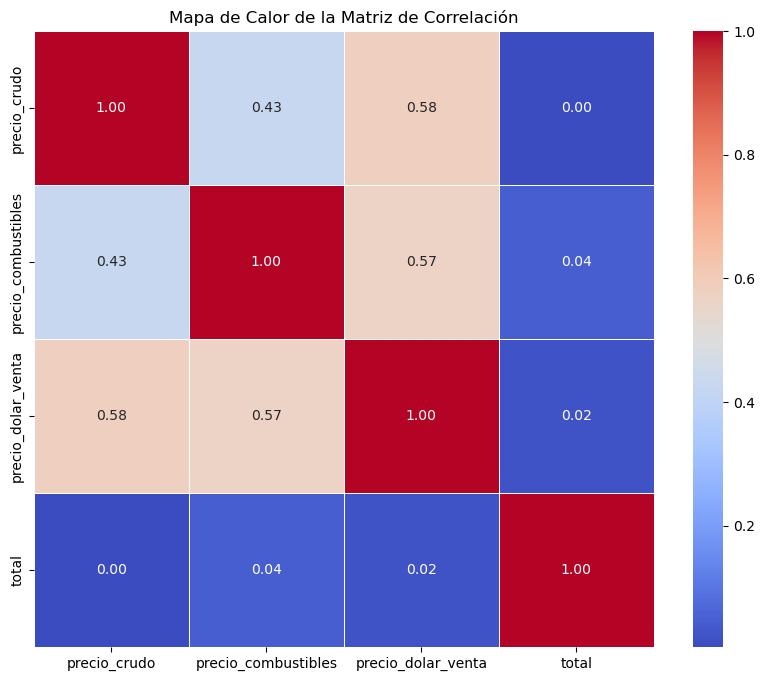

In [ ]:
numeric_df = merge_all_df[['precio_crudo', 'precio_combustibles', 'precio_dolar_venta', 'total']]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, 
    cmap='coolwarm',  
    fmt=".2f",  
    linewidths=.5  
)

plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()